# Question 1

Write a python function that returns $2\sin(x^2) + \ln(|x|) + 1$ for a given real number $x$.

In [1]:
from math import sin, log

def f(x):
    return 2*sin(x**2) + log(abs(x)) + 1.0

f(1.0)

2.682941969615793

# Question 2

Write a python function that takes

* A function `f(x)`
* A pair of real numbers `(a,b)`
* An integer `N`

as input and returns the Riemann sum of `f(x)` on the interval `[a,b]` with `N` equal subdivisions.

In [2]:
import numpy as np
from math import pi

def RiemannSum(f, interval, N):
    a,b = interval
    dx = (b-a)/N
    xs = np.linspace(a,b,N)
    fv = np.vectorize(f)
    return dx*sum(fv(xs))

RiemannSum(sin,(0,pi),100)

1.9798338422550525

# Question 3

* Pull 100 uniformly random numbers from the interval $[0,1]$ as an array `xs`.
* Add 0 at the beginning of the array, and 1.0 at the end.
* Sort the array `xs` from smallest to the largest.
* Calculate its discrete derivative `ys`, i.e. let $y_i = x_{i+1} - x_i$

In [3]:
from numpy.random import uniform

xs = np.append(np.array([0.0, 1.0]), uniform(0.0,1.0,100))
xs.sort()
ys = np.diff(xs) 
ys

array([0.01453743, 0.00156663, 0.00534638, 0.00096398, 0.00508993,
       0.00113972, 0.00794464, 0.00759768, 0.01644741, 0.0231801 ,
       0.00176902, 0.004525  , 0.00651795, 0.02118523, 0.00246595,
       0.00211198, 0.00827289, 0.0095773 , 0.01107778, 0.00116672,
       0.00555542, 0.00197661, 0.00577502, 0.00075182, 0.00150462,
       0.03740627, 0.00321144, 0.01643881, 0.00950991, 0.00428141,
       0.00352253, 0.03885483, 0.04457475, 0.00533743, 0.01936863,
       0.00513555, 0.01066424, 0.00294978, 0.00050975, 0.02545816,
       0.00922468, 0.00474569, 0.0266568 , 0.00308083, 0.00432957,
       0.00399059, 0.00019818, 0.00880208, 0.00519906, 0.01766466,
       0.00367313, 0.00523431, 0.011792  , 0.00963488, 0.00749983,
       0.01861325, 0.00230705, 0.01085615, 0.01071165, 0.00674251,
       0.00317664, 0.00183448, 0.01546867, 0.01741572, 0.00078044,
       0.02498636, 0.02380307, 0.00063454, 0.02738756, 0.00156014,
       0.01222296, 0.04473237, 0.00149226, 0.00895459, 0.03045

# Question 4

* Pull 100 uniformly random numbers from the interval $[0,1]$ into an array `xs`.
* Pull 100 random numbers from the Gaussion distribution with $\mu=0$ and $\sigma=1.0$ into an array `ys`.
* Scatter plot `xs` against `ys` using `matplotlib`


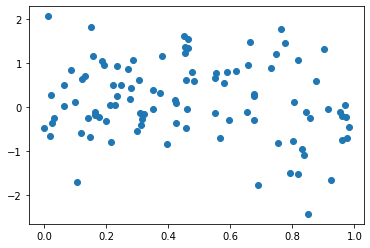

In [4]:
from numpy.random import uniform, normal
from matplotlib.pyplot import scatter

xs = uniform(0.0, 1.0, 100)
ys = normal(0.0, 1.0, 100)

scatter(xs,ys)

# Question 5

Using the `numpy` library

* Pull a random $100\times 100$ matrix
* Calculate its 100-th power
* Calculate its eigen-values
* Calculate is [Singular Value Decomposition](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)

In [5]:
A = np.random.rand(100,100)
A100 = A**100
eigval, eigvec = np.linalg.eig(A)
u,s,vh = np.linalg.svd(A)

# Question 6

* Pull the text of a novel by Dickens from the website of [Gutenberg Project](https://www.gutenberg.org/)
* Remove all non-alphanumeric characters 
* Split the text into words and convert them into lower case
* Count the number of distinct words in the  text
* Count how many times each word occurs within the text

In [6]:
from urllib.request import urlopen
from collections import Counter
from re import sub

raw = urlopen("https://www.gutenberg.org/files/1400/1400-0.txt")
text = raw.read().decode('utf-8').lower()
processed = sub('[^a-z ]','',text).split()

len(set(processed))

23777

# Question 7

* Write a python function `CountWords` that takes the URL for a text and returns the number of unique words within the text.
* Write a python function `Top20Words` that takes the URL for a text and returns the most frequently appearing top 20 words within the text.

In [7]:
def CountWords(url):
    raw = urlopen(url)
    text = raw.read().decode('utf-8').lower()
    processed = sub('[^a-z ]','',text).split()
    return len(set(processed))

CountWords('https://www.gutenberg.org/files/1400/1400-0.txt')

23777

In [8]:
def TopNWords(url, N):
    raw = urlopen(url)
    text = raw.read().decode('utf-8').lower()
    processed = sub('[^a-z ]','',text).split()
    res = Counter(processed)
    return sorted(res,key=res.get,reverse=True)[:N]

TopNWords('https://www.gutenberg.org/files/1400/1400-0.txt',20)

['the',
 'and',
 'i',
 'to',
 'of',
 'a',
 'in',
 'that',
 'was',
 'it',
 'he',
 'you',
 'had',
 'my',
 'me',
 'his',
 'with',
 'as',
 'at',
 'said']

# Question 8

* Pull the [IMKB](https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx) data from UCI using pandas.
* Plot the TL based ISE and USD based ISE columns together in the same graph.
* Calculate how many times `NIKKEI` was higher than `FTSE`.

/home/kaygun/.local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


261

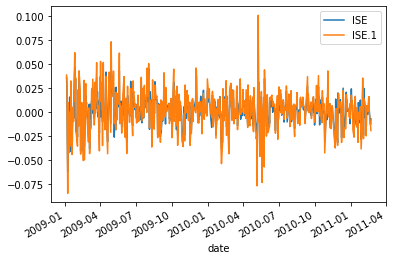

In [9]:
import pandas as pd

data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx', header=1)

data.plot('date',['ISE','ISE.1'])

len(data['date'][data['NIKKEI']>data['FTSE']])

# Question 9

Using the [networkx](https://networkx.org/) library

* Get the [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) of the [Peterson graph](https://en.wikipedia.org/wiki/Petersen_graph).
* Calculate its eigen-values and eigen-vectors using the [numpy](https://numpy.org/) library.
* Repeat the same for a [random 3-regular graph on 10 vertices](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.generators.random_graphs.random_regular_graph.html).

In [10]:
import networkx as nx

G = nx.petersen_graph()
A = nx.linalg.adj_matrix(G)
np.linalg.eig(A.todense())

(array([-2.,  1.,  3., -2., -2.,  1., -2.,  1.,  1.,  1.]),
 matrix([[ 0.63245553, -0.70710678, -0.31622777,  0.01255815,  0.01063778,
           0.20943433,  0.01522339, -0.17868297,  0.15664612,  0.15799877],
         [-0.42163702, -0.23570226, -0.31622777,  0.26924694, -0.13448726,
          -0.17276436, -0.1672792 ,  0.18584327, -0.45846497, -0.51846802],
         [ 0.10540926,  0.23570226, -0.31622777, -0.59778848,  0.08700056,
          -0.02956044, -0.18505773,  0.33668975, -0.01542183, -0.27959959],
         [ 0.10540926,  0.23570226, -0.31622777,  0.3928542 ,  0.37097213,
           0.52644379,  0.09776702,  0.01983857,  0.30467662,  0.31976892],
         [-0.42163702, -0.23570226, -0.31622777, -0.0768708 , -0.3341232 ,
           0.56077884,  0.23934652, -0.63426966,  0.49692175,  0.584534  ],
         [-0.42163702, -0.23570226, -0.31622777, -0.21749243,  0.44733491,
          -0.17858015, -0.10251411,  0.26974342,  0.11818934,  0.09193279],
         [ 0.10540926,  0.23570226

In [11]:
G = nx.random_regular_graph(3,10)
A = nx.linalg.adj_matrix(G)
np.linalg.eig(A.todense())

(array([ 3.00000000e+00, -2.56155281e+00, -1.00000000e+00,  1.56155281e+00,
        -2.00000000e+00, -2.00000000e+00,  8.78258056e-17,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00]),
 matrix([[ 3.16227766e-01,  3.94102719e-01,  5.00000000e-01,
          -3.07706105e-01,  2.58198890e-01, -3.26829467e-03,
          -8.93020533e-17,  5.77350269e-01,  5.39791032e-02,
          -2.02355303e-01],
         [ 3.16227766e-01, -3.94102719e-01, -5.00000000e-01,
           3.07706105e-01,  2.58198890e-01, -3.26829467e-03,
          -3.76050283e-17,  5.77350269e-01,  5.39791032e-02,
          -2.02355303e-01],
         [ 3.16227766e-01,  3.07706105e-01,  4.50787711e-16,
           3.94102719e-01, -3.87298335e-01,  2.93554449e-01,
          -5.00000000e-01,  1.84735115e-17,  4.50390253e-02,
          -3.81692034e-01],
         [ 3.16227766e-01, -5.71396271e-16, -1.34962769e-16,
           1.44630523e-16,  2.58198890e-01, -5.80572309e-01,
          -8.52966875e-17, -2.88675135e-01, -4.76